Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# encoding , scaling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize

# split data
from sklearn.model_selection import train_test_split, GridSearchCV

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression 

# evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, mean_squared_error,roc_curve, roc_auc_score, auc


1- DATA EXPLORATION

In [84]:
# reading data
df = pd.read_csv(r"C:\Users\dohah\Documents\Projects\Detecting Malaria Model\MachineLearningProject\data_set\healthcare_dataset.csv")

In [85]:
# data exploration 
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [86]:
# rounding billing amount to be int -- need to check for LR 
df['Billing Amount'] = np.round(df['Billing Amount'] , 2) 

In [87]:
# data exploration 
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


In [88]:
print(df['Insurance Provider'].value_counts())
print(sum(df['Insurance Provider'].value_counts()))
print("------------------------------------------------------------------------------")
print(df.dtypes)
print("------------------------------------------------------------------------------")
print(df.isnull().sum())

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64
55500
------------------------------------------------------------------------------
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object
------------------------------------------------------------------------------
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insur

2- DATA PREPROCESSING

In [89]:
# Transform the 'Date of Admission' column from object to date

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format = '%Y-%m-%d')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format = '%Y-%m-%d')

In [90]:
# data exploration 
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [92]:
# handeling missing data - there is no missing data
# .
# .

In [93]:
# target selecting
target = 'Billing Amount'


In [94]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [97]:
# featur selecting
feature_cols = ['Medical Condition','Date of Admission', 'Hospital', 'Discharge Date', 'Medication']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# encoding feature -> lable 
# mapping = {
#     'Elective': 0,
#     'Urgent': 1,
#     'Emergency': 2
# }

# df['Admission Type'] = df['Admission Type'].map(mapping)
# print(df['Admission Type'].unique())


In [98]:
# X & Y matrices

# encoding categorical features -> one hot
X = encoder.fit_transform(df[feature_cols])

y = df[target] # target label     --- 0- Abnormal, 1-Inconclusive, 2- Normal

MemoryError: Unable to allocate 18.0 GiB for an array with shape (55500, 43570) and data type float64

In [ ]:
# X check
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [11]:
# y check
pd.DataFrame(y).head()

,0
0,2
1,1
2,2
3,0
4,0


In [12]:
# split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y,
                                                    shuffle=True
                                                    )


In [13]:
# scaling
scaler = StandardScaler()
X_train[:, :len(X_num)] = scaler.fit_transform(X_train[:, :len(X_num)])
X_test[:, :len(X_num)] = scaler.transform(X_test[:, :len(X_num)])

Missing values -not finished-

3- LR MODEL *debuging state*

In [99]:
# Linear Regression

# train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# predict y
y_pred = regressor.predict(X_test)


In [36]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(11100,))

4- EVALUATION

In [17]:
# need to be delete
print("Multiple Linear Regression Results:")
cr = classification_report(y_test, y_pred, target_names=le.classes_)
print("classification_report : \n",cr)

Multiple Linear Regression Results:
classification_report : 
               precision    recall  f1-score   support

    Abnormal       0.00      0.00      0.00      3726
Inconclusive       0.33      1.00      0.50      3671
      Normal       0.00      0.00      0.00      3703

    accuracy                           0.33     11100
   macro avg       0.11      0.33      0.17     11100
weighted avg       0.11      0.33      0.16     11100



C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

In [34]:
# bad accuracy  -- need to be high
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.33072072072072073


Confusion Matrix

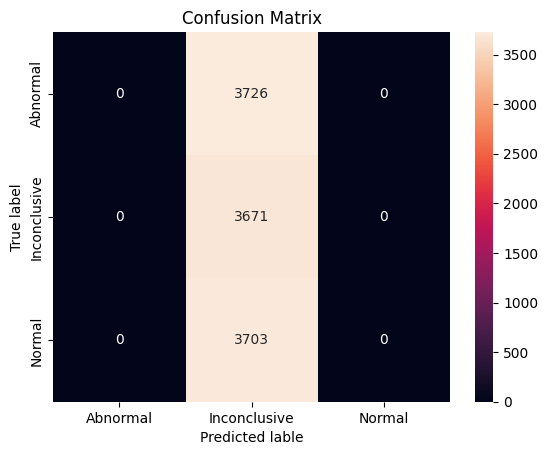

In [21]:
cm = confusion_matrix(y_test, y_pred)  

cm_df = pd.DataFrame(cm,
                     index= le.classes_,
                     columns= le.classes_)

sns.heatmap(cm_df, fmt='d', annot= True) # fmt='d' -> d means integer nombers will show
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted lable')
plt.show()



Loss Curve #or MSE or plot regression line

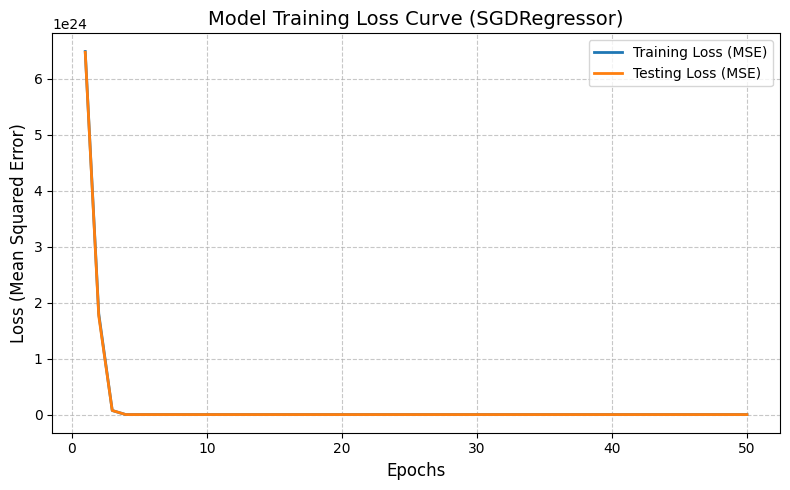

In [29]:
# --- Assuming X_train, y_train, X_test, y_test are already defined ---

# Initialize SGDRegressor: This model trains iteratively (like a neural network)
# and we configure it to use a known loss function (squared_error, which is MSE).
# We also set warm_start=True to allow for iterative partial fitting.

# SGDRegressor requires y_train to be 1D, which it already is from the preprocessing.
# SGDRegressor is sensitive to scaling, which you already applied with StandardScaler,
# so we can proceed.

n_epochs = 50
loss_history_train = []
loss_history_test = []

# Initialize the model: max_iter is 1 for partial_fit, we control epochs manually.
# Setting learning rate to 'optimal' for simplicity.
sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, learning_rate='optimal',
                       loss='squared_error', random_state=42, warm_start=True)

# Train the model iteratively to collect the loss curve data
for epoch in range(n_epochs):
    # Perform one iteration (epoch) of training
    sgd_reg.partial_fit(X_train, y_train)

    # Calculate loss (MSE) on both train and test sets
    y_pred_train = sgd_reg.predict(X_train)
    y_pred_test = sgd_reg.predict(X_test)

    # MSE is the 'loss' in this context
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    loss_history_train.append(mse_train)
    loss_history_test.append(mse_test)

# --- Plot the Loss Curve over epochs ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_epochs + 1), loss_history_train, label='Training Loss (MSE)', color='#1f77b4', linewidth=2)
plt.plot(range(1, n_epochs + 1), loss_history_test, label='Testing Loss (MSE)', color='#ff7f0e', linewidth=2)

plt.title("Model Training Loss Curve (SGDRegressor)", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss (Mean Squared Error)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

ROC #need to understand

C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dohah\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


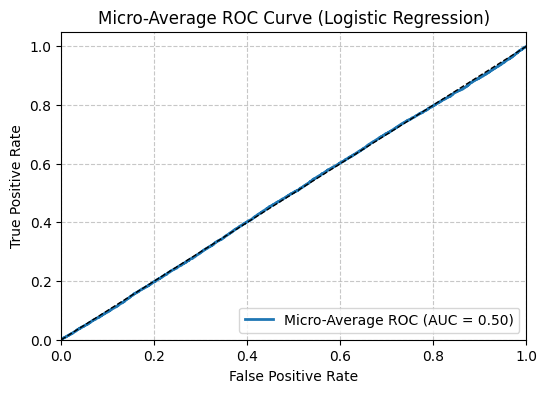

In [33]:

# --- Assuming X_train, y_train, X_test, y_test are already defined ---

# 1. Train the Logistic Regression model (set max_iter high since data is large)
# LogisticRegression is a linear classifier and provides probability scores needed for ROC.
lin_reg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42, max_iter=200)
lin_reg.fit(X_train, y_train)

# 2. Get the prediction PROBABILITIES (confidence scores) for the test set
# This output will be of shape (n_samples, n_classes), which is necessary for micro-average ROC.
y_score = lin_reg.predict_proba(X_test)

# 3. Binarize the true labels (One-vs-Rest format)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# --- 4. Calculate the Micro-Average ROC curve ---
# Now both arrays will have the correct, matching shape (33300) when flattened.
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# --- 5. Plot the simple Micro-Average ROC Curve ---
plt.figure(figsize=(6, 4))

# Plot the Micro-Average Curve
plt.plot(fpr_micro, tpr_micro, color='#1f77b4', lw=2,
         label=f'Micro-Average ROC (AUC = {roc_auc_micro:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-Average ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

.
.
.
.

.
.
.
.

ALL after need to check

Distribution of Test Results #need a look

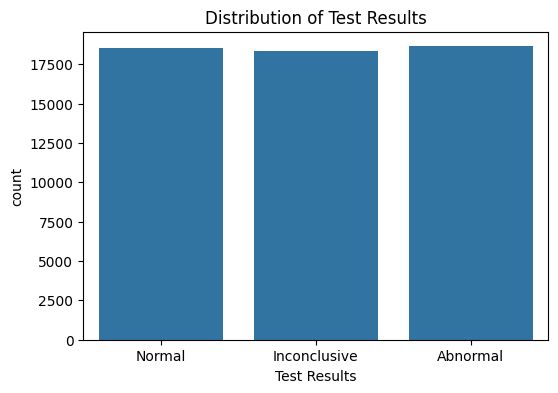

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Test Results', data=df)
plt.title("Distribution of Test Results")
plt.show()

In [ ]:
print("First 4 rows of X (numerical + one-hot features):")
print(X[:4])


Loos curve wrong way

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_knn)  # MSE as an evaluation metric
print(mse)

In [ ]:
y_pred = model.predict(X)
plt.scatter(X[:,-3], y)
plt.plot(X[:,-3], y_pred, color='r')

Loos curve chatGPT way

In [60]:
lin_reg = LinearRegression()

# تدريب الموديل على بيانات التدريب
lin_reg.fit(X_train, y_train)

# التنبؤ على بيانات التدريب والاختبار
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_test_class = np.round(y_pred_test).astype(int)  # تقريب للقيم الصحيحة للفئات

# حساب MSE لكل من train و test
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Linear Regression MSE (train):", mse_train)
print("Linear Regression MSE (test):", mse_test)


Linear Regression MSE (train): 0.669025846714669
Linear Regression MSE (test): 0.6694408599679678


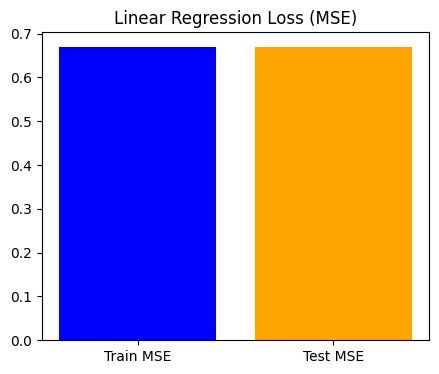

In [61]:
plt.figure(figsize=(5,4))
plt.bar(['Train MSE', 'Test MSE'], [mse_train, mse_test], color=['blue','orange'])
plt.title("Linear Regression Loss (MSE)")
plt.show()


Accuracy #high error

In [62]:
# Linear Regression (بعد تقريب القيم)
acc_lr = accuracy_score(y_test, np.round(lin_reg.predict(X_test)).astype(int))
print("Linear Regression Accuracy:", acc_lr)

# KNN
# knn = KNeighborsClassifier()
acc_knn = accuracy_score(y_test, knn_gscv.predict(X_test))
print("KNN Accuracy:", acc_knn)


Linear Regression Accuracy: 0.33072072072072073
KNN Accuracy: 0.43018018018018017


wrong graph

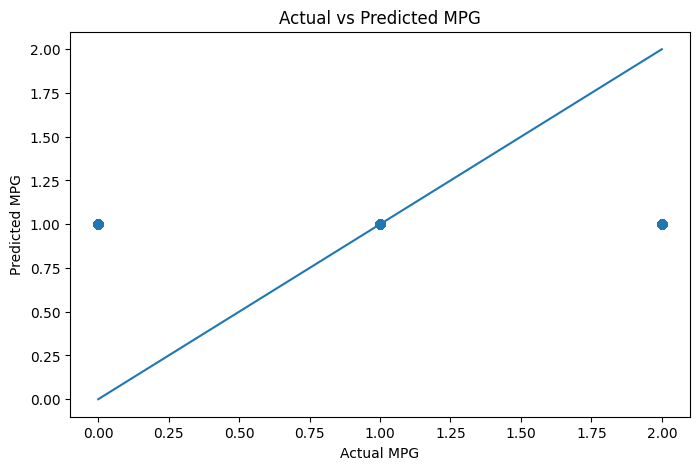

0.6692792792792793


In [26]:
mse = mean_squared_error(y_test, y_pred)

plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")

# Line y = x for reference (perfect prediction)
# Find the smallest value across both actual and predicted MPG
min_val = min(y_test.min(), y_pred.min())
# Find the largest value across both actual and predicted MPG
max_val = max(y_test.max(), y_pred.max())
# Plot a straight line between (min_val, min_val) and (max_val, max_val)
plt.plot([min_val, max_val], [min_val, max_val])

plt.show()
print(mse)